In [48]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# import os
import random


from empirical_data import *
from optimized_random_response import *
from randomized_response import *
from repetitive_optimizer import *
from synthetic_dataset import *
from exponential_mechanism import *
from simpleinfotheory import *
from normalize_error_matrix import *


## Generate Synthetic Datasets

In [49]:
from alphabet import *

NUM_ATTRIBUTES = 2
NUM_STATES = [2, 2] # [3, 3]
DATASET_SIZE = 10000

priority_dict = {} # {'0': 2, '1': 0.5}

TOTAL_STATES = 1
alphabet_dict = {}
for i in range(NUM_ATTRIBUTES):
    TOTAL_STATES *= NUM_STATES[i]
    alphabet_dict[str(i)] = np.arange(NUM_STATES[i])

ALL_ALPHABET = create_alphabet(attributes_with_alphabet=alphabet_dict)
STRING_ALL_ALPHABET = convert_alphabet_to_string(ALL_ALPHABET)
ATTRIBUTE_LIST = list(alphabet_dict.keys())
# random_dist = np.array([random.randint(1, 5000) for i in range(TOTAL_STATES)])
# random_dist = random_dist/np.sum(random_dist)
# random_dist = [0.3, 0.01, 0.01, 0.01, 0.30, 0.01, 0.01, 0.01, 0.34]
random_dist = [0.25, 0.25, 0.25, 0.25] # [0.5, 0.025, 0.025, 0.45]

print("Alphabet ", ALL_ALPHABET)
print("ATTRIBUTE_LIST ", ATTRIBUTE_LIST)

synthetic_dataset_constructor = Gen_Synthetic_Dataset(no_of_states = TOTAL_STATES, no_of_samples = DATASET_SIZE, alphabet=STRING_ALL_ALPHABET)
correlated_synthetic_dataset = synthetic_dataset_constructor.gen_custom(distribution=random_dist)

uniform_synthetic_dataset = synthetic_dataset_constructor.gen_uniform()



Alphabet  [[0 0]
 [0 1]
 [1 0]
 [1 1]]
ATTRIBUTE_LIST  ['0', '1']


## Claculate Error Matrix

{'[0 0]': 0, '[0 1]': 1, '[1 0]': 2, '[1 1]': 3}


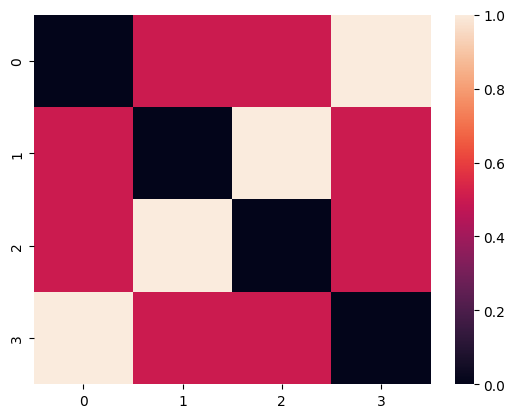

In [50]:
alphabet_dict = {}
for i in range(len(ALL_ALPHABET)):
    alphabet_dict[str(ALL_ALPHABET[i])] = i
print(alphabet_dict)
normalize_error_matrix = Normalize_error_matrix(attribute_list=ATTRIBUTE_LIST, alphabet=ALL_ALPHABET, priority_dict=priority_dict, alphabet_dict=alphabet_dict)
err_matrix = normalize_error_matrix.normalized_error_matrix
sns.heatmap(err_matrix)
plt.show()

## Calculate Mutual Information

### Pair-wise information leakage of A: I(A;A')

In [51]:
def mutual_info_pair(a, b):
    return mutualinformationempirical(xn=a, yn=b)[0]

### Total information leakage of A: I(A;A',B')

In [52]:
# I(A;A',B') = I(A;A') + I(A;B'|A')

def conditional_mutual_info(a, b, c):
    return conditionalmutualinformationempirical(a, b, c)

def total_info_leakage(A, A_prime, B_prime):
    return  mutual_info_pair(A, A_prime) + conditional_mutual_info(A, B_prime, A_prime)

In [53]:
def mutual_information(a, b):
    processed_a = []
    # print(a)
    # print(b)
    for i in a:
        actual_split = i.split(" ")
        actual = []
        # print(actual_split)
        for j in actual_split:
            # print(i)
            if j != "" :
                actual.append(int(j))
        processed_a.append(np.array(actual))
    processed_a = np.array(processed_a)
    processed_b = []
    
    for i in b:
        actual_split = i.split(" ")
        actual = []
        # print(actual_split)
        for j in actual_split:
            # print(i)
            if j != "" :
                actual.append(int(j))
        processed_b.append(np.array(actual))
    processed_b = np.array(processed_b)

    mi = []
    # print("processed_a", processed_a)
    # print("processed_b", processed_b)
    # for i in range(np.shape(processed_b)[1]):
    #     mi.append(mutual_info_pair(processed_a[:,i], processed_b[:,i]))
    # mi.append(mutual_info_pair(processed_a[:,0], processed_a[:,1]))
    mi.append(mutual_info_pair(processed_b[:,1], processed_b[:,0]))
    # mi.append(mutual_info_pair(processed_a[:,0], processed_b[:,0]))
    # mi.append(mutual_info_pair(processed_a[:,1], processed_b[:,1]))
    mi.append(total_info_leakage(processed_a[:,0], processed_b[:,0], processed_b[:,1]))
    mi.append(total_info_leakage(processed_a[:,1], processed_b[:,1], processed_b[:,0]))
    # mi.append(total_info_leakage(processed_a[:,0], processed_b[:,1], processed_b[:,0]))
    return mi
    

## Benchmark Optimal Mechanism

In [54]:
EPS_ARRAY = np.arange(16)*0.6

### Correlated Distribution

0.0
posterior_prob_distribution  [0.2555918  0.2561409  0.23267551 0.2555918 ]
Distance  0.02000962568155526


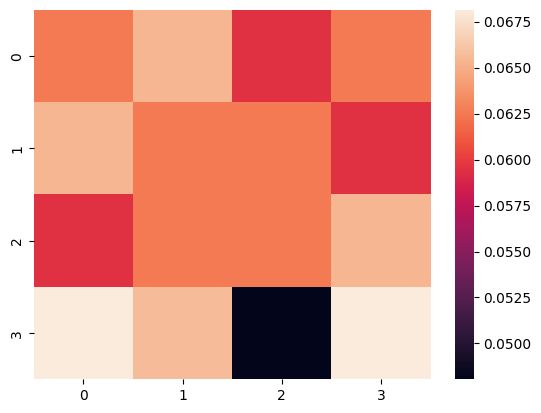

0.6
posterior_prob_distribution  [0.25377154 0.24622846 0.24622846 0.25377154]
Distance  0.007543075033199009


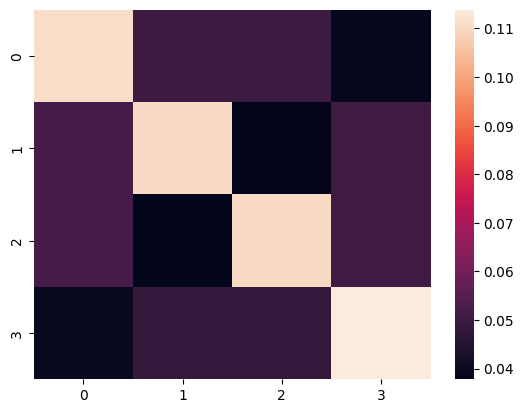

1.2
posterior_prob_distribution  [0.24020628 0.25979372 0.25979372 0.24020628]
Distance  0.019587448258702636


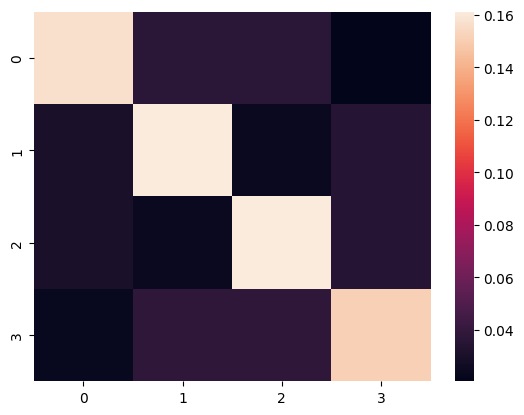

1.7999999999999998
posterior_prob_distribution  [0.24800026 0.25199974 0.25199974 0.24800026]
Distance  0.003999476527265969


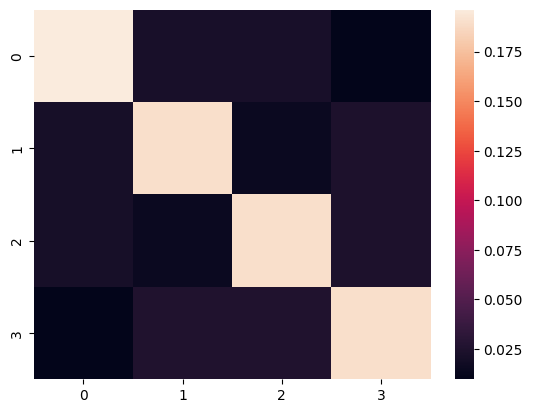

2.4
posterior_prob_distribution  [0.26436539 0.23563461 0.23563461 0.26436539]
Distance  0.028730780398003863


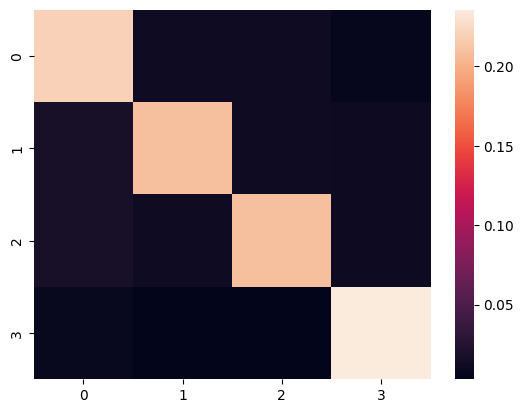

3.0
posterior_prob_distribution  [0.26236864 0.23763136 0.23763136 0.26236864]
Distance  0.024737286010788714


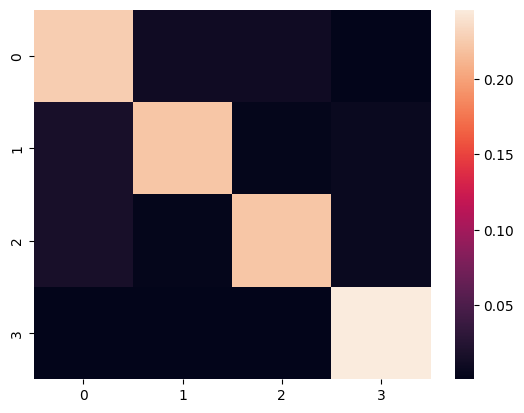

3.5999999999999996
posterior_prob_distribution  [0.25351893 0.24648107 0.24648107 0.25351893]
Distance  0.00703785806882537


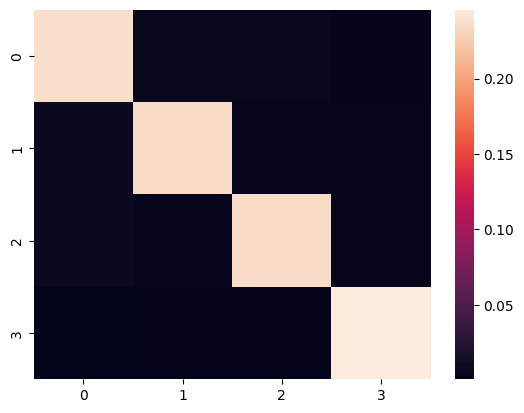

4.2
posterior_prob_distribution  [0.25160636 0.24839364 0.24839364 0.25160636]
Distance  0.0032127202861423065


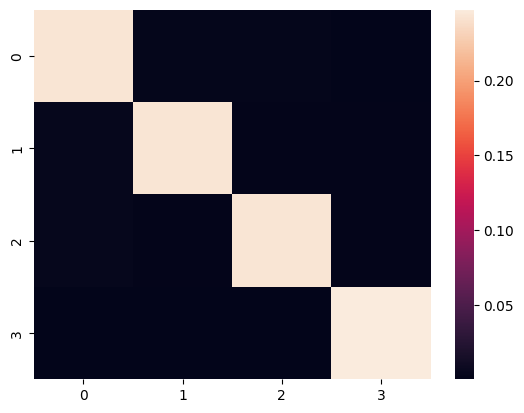

4.8
posterior_prob_distribution  [0.25010351 0.24989649 0.24989649 0.25010351]
Distance  0.00020702109597059426


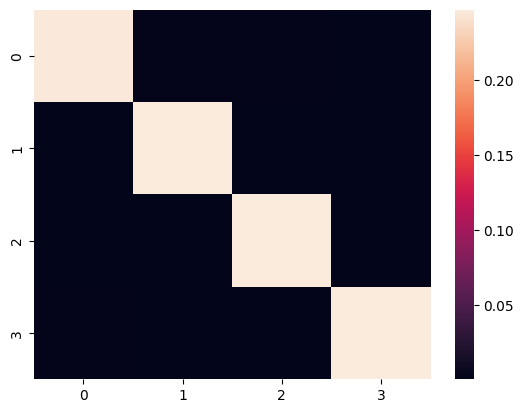

5.3999999999999995
posterior_prob_distribution  [0.24988784 0.25011216 0.25011216 0.24988784]
Distance  0.0002243224320875315


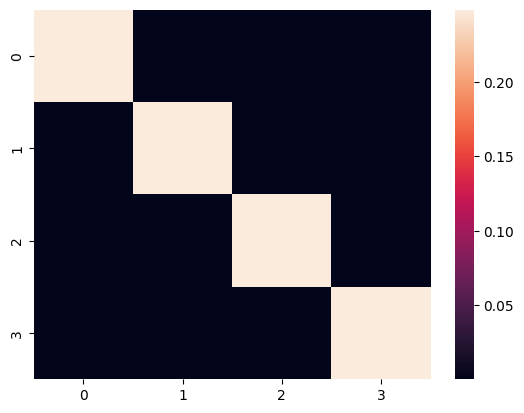

6.0
posterior_prob_distribution  [0.25032517 0.24967483 0.24967483 0.25032517]
Distance  0.0006503306209419274


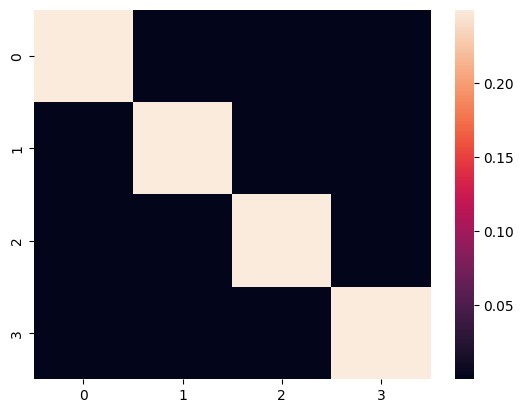

6.6
posterior_prob_distribution  [0.25061962 0.24938038 0.24938038 0.25061962]
Distance  0.0012392400330196035


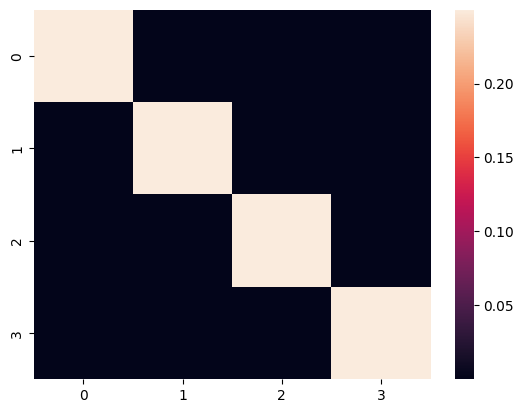

7.199999999999999
posterior_prob_distribution  [0.24979892 0.25020108 0.25020108 0.24979892]
Distance  0.00040215345366789723


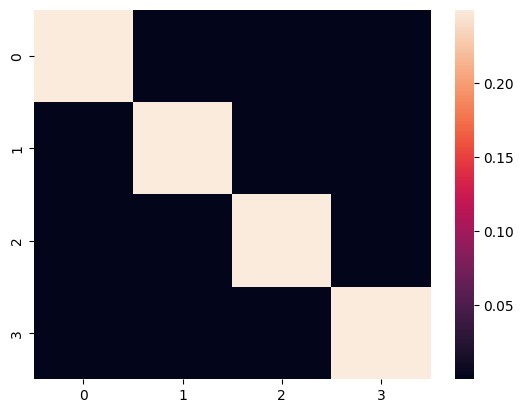

7.8
posterior_prob_distribution  [0.24998022 0.25001978 0.25001978 0.24998022]
Distance  3.956278455001516e-05


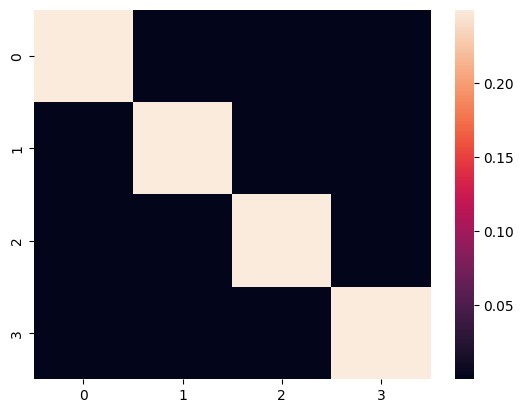

8.4
posterior_prob_distribution  [0.25001271 0.24998729 0.24998729 0.25001271]
Distance  2.541674876102573e-05


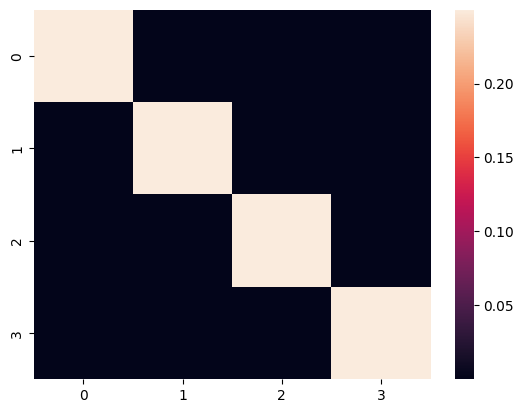

9.0
posterior_prob_distribution  [0.24997765 0.25002235 0.25002235 0.24997765]
Distance  4.4695386673537785e-05


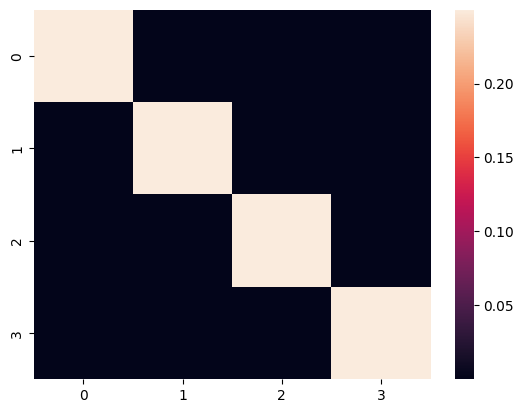

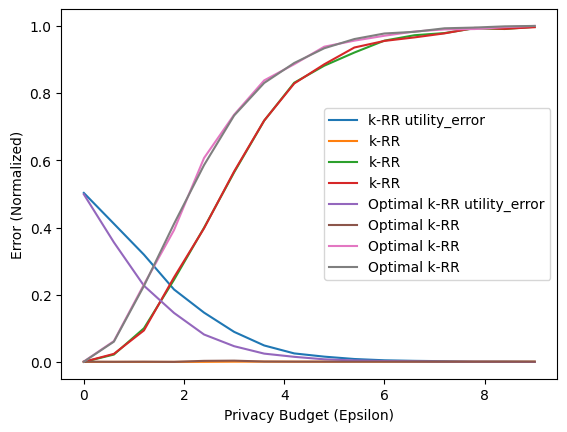

In [58]:
exponential_mechanism_without_prior = Exponential_mechanism(prior_dist=random_dist, STATE_COUNT=TOTAL_STATES, INPUT_ALPHABET=STRING_ALL_ALPHABET, normalized_objective_err_matrix=err_matrix, only_err_matrix=True)

exponential_mechanism_with_prior = Exponential_mechanism(prior_dist=random_dist, STATE_COUNT=TOTAL_STATES, INPUT_ALPHABET=STRING_ALL_ALPHABET, normalized_objective_err_matrix=err_matrix, only_err_matrix=False)

random_response_mechanism = Randomized_Response(STATE_COUNT=TOTAL_STATES, INPUT_ALPHABET=STRING_ALL_ALPHABET, normalized_objective_err_matrix=err_matrix)

optimal_random_response_mechanism = Optimized_Randomized_Response(prior_dist = random_dist, STATE_COUNT = TOTAL_STATES, INPUT_ALPHABET = STRING_ALL_ALPHABET, normalized_objective_err_matrix = err_matrix, 
                 TOLERANCE_MARGIN = 0.01, APPROXIMATION = "LINEAR", solver = "MOSEK", is_kl_div = False, ALPHA=0.0001)

# mechanisms_dict = {"Exp. mechanism without prior": exponential_mechanism_without_prior, "Exp. mechanism with prior": exponential_mechanism_with_prior, "k-RR": random_response_mechanism, "Optimal k-RR": optimal_random_response_mechanism}
mechanisms_dict = {"k-RR": random_response_mechanism, "Optimal k-RR": optimal_random_response_mechanism}

error_dict = {}
mi_dict = {}
total_mi_dict = {}

for key in list(mechanisms_dict.keys()):
    error_dict[key] = []
    mi_dict[key] = []
    total_mi_dict[key] = []

for eps in EPS_ARRAY:
    for mechanism in list(mechanisms_dict.keys()):
        __tot_error = 0
        __perturbed_value_list = []
        for entry in correlated_synthetic_dataset:
            # entry = entry_np_value[0]
            __perturbed_value_list.append(mechanisms_dict[mechanism].gen_random_output(actual_value=entry, eps=eps)[0])

            # print(entry,__perturbed_value_list[-1])
            __error = normalize_error_matrix.get_value_error(actual=entry, perturbed=__perturbed_value_list[-1])
            __tot_error += __error
        error_dict[mechanism].append(__tot_error/len(uniform_synthetic_dataset))
        # mi_dict[mechanism].append(mutual_info_pair(correlated_synthetic_dataset, __perturbed_value_list))
        # total_mi_dict[mechanism].append(total_info_leakage(correlated_synthetic_dataset, __perturbed_value_list, ))
        mi_dict[mechanism].append(mutual_information(correlated_synthetic_dataset, __perturbed_value_list))

        if mechanism == "Optimal k-RR":
            optimal_mechanism = mechanisms_dict[mechanism].get_mechanism(eps=eps)
            
            posterior_prob_distribution = np.zeros(TOTAL_STATES)
            posterior_joint_prob = np.zeros((TOTAL_STATES, TOTAL_STATES))
            for i in range(TOTAL_STATES):
                posterior_joint_prob[:,i] = np.reshape(optimal_mechanism[:,i] * np.array(random_dist), (4,))
                posterior_prob_distribution[i] = np.sum(optimal_mechanism[:,i] * np.array(random_dist))
            print("posterior_prob_distribution ", posterior_prob_distribution)
            print("Distance ", np.linalg.norm((random_dist-posterior_prob_distribution), 2))
            sns.heatmap(posterior_joint_prob)
            plt.show()
lagends = []
for mechanism in list(mechanisms_dict.keys()):
    lagends.append(mechanism + " utility_error")
    plt.plot(EPS_ARRAY, error_dict[mechanism])
    # lagends.append(mechanism + " info_leakage")
    # plt.plot(EPS_ARRAY, mi_dict[mechanism])
    # lagends.append(mechanism + " total_info_leakage")
    # plt.plot(EPS_ARRAY, total_mi_dict[mechanism])
    for mi_ in range(len(mi_dict[mechanism][0])):
        plt.plot(EPS_ARRAY, np.array(mi_dict[mechanism])[:,mi_])
        lagends.append(f"{mechanism}")
        # legend.append(f"MI for Optimal, attr:{grouped_attributes_list[i][mi_]}")

plt.legend(lagends)
plt.xlabel("Privacy Budget (Epsilon)")
plt.ylabel("Error (Normalized)")
# plt.title(f"{error_cal_type} error between original value and perturbed value for {Attr_list}")
plt.show()

## Uniform Distribution

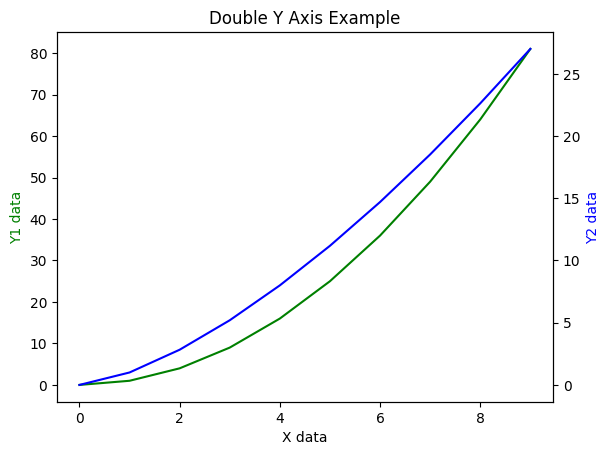

In [ ]:
import matplotlib.pyplot as plt

# Create figure and first axis
fig, ax1 = plt.subplots()

# Plot data on first axis
x = range(10)
y1 = [i**2 for i in x]
ax1.plot(x, y1, 'g-')
ax1.set_xlabel('X data')
ax1.set_ylabel('Y1 data', color='g')

# Create second axis
ax2 = ax1.twinx()

# Plot data on second axis
y2 = [i**1.5 for i in x]
ax2.plot(x, y2, 'b-')
ax2.set_ylabel('Y2 data', color='b')

# Show plot
plt.title('Double Y Axis Example')
plt.show()
